In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
# data
data = pd.read_excel("dataGYM.xlsx")
data.head()

,Age,Height,weight,BMI,Class,Prediction
0,48,4.1,86,40,Extremely obese,Extremely obese--normal exercise+yoga+heavy di...
1,53,4.1,91,42,Extremely obese,Extremely obese--normal exercise+yoga+heavy di...
2,42,4.1,95,44,Extremely obese,Extremely obese--normal exercise+yoga+heavy di...
3,48,4.1,100,46,Extremely obese,Extremely obese--normal exercise+yoga+heavy di...
4,22,4.1,104,48,Extremely obese,Extremely obese--normal exercise+yoga+heavy di...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         1176 non-null   int64  
 1   Height      1176 non-null   float64
 2   weight      1176 non-null   int64  
 3   BMI         1176 non-null   int64  
 4   Class       1176 non-null   object 
 5   Prediction  1176 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 55.2+ KB


In [4]:
df = data.iloc[:,:-1]
df["Class"].unique()

array(['Extremely obese', 'Healthy\xa0', 'Obese', 'Overweight',
       'Under weight', 'EXtremely obese'], dtype=object)

In [5]:
df["Class"].replace({"EXtremely obese":"Extremely obese", "Healthy\xa0":"Healthy", "Under weight":"Underweight"}, inplace=True)
df["Class"].unique()

array(['Extremely obese', 'Healthy', 'Obese', 'Overweight', 'Underweight'],
      dtype=object)

In [6]:
df.columns = ['Age', 'Height(feet)', 'weight(kgs)', 'BMI', 'Class']

In [7]:
df.head()

,Age,Height(feet),weight(kgs),BMI,Class
0,48,4.1,86,40,Extremely obese
1,53,4.1,91,42,Extremely obese
2,42,4.1,95,44,Extremely obese
3,48,4.1,100,46,Extremely obese
4,22,4.1,104,48,Extremely obese


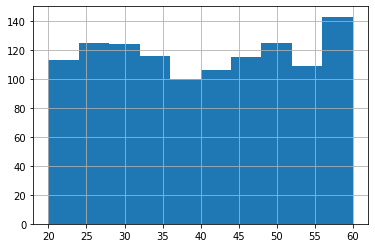

In [8]:
df["Age"].hist()

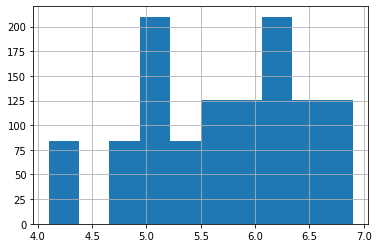

In [9]:
df["Height(feet)"].hist()

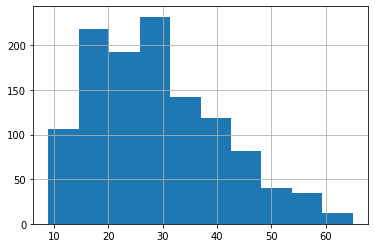

In [10]:
df["BMI"].hist()

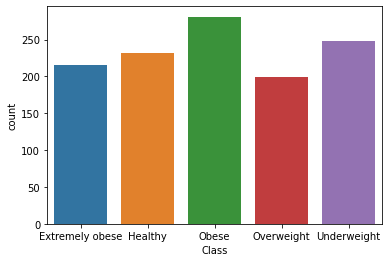

In [11]:
sns.countplot(df["Class"])

In [12]:
df.groupby("Class").mean()

,Age,Height(feet),weight(kgs),BMI
Class,,,,
Extremely obese,40.550926,4.997315,114.796296,47.981481
Healthy,40.418103,5.836379,71.646552,21.543103
Obese,40.088968,5.640427,103.409253,33.953737
Overweight,39.532663,5.795578,88.914573,27.221106
Underweight,38.584677,6.127903,53.185484,14.741935


In [13]:
x = df.iloc[:,:-2]
y = df.iloc[:,-1]

In [14]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10, stratify=y)
for i in [x_train, x_test, y_train, y_test]:
  print(i.shape)

(940, 3)
(236, 3)
(940,)
(236,)


In [16]:
sv_classifier = svm.SVC(kernel="linear")

In [17]:
#train the support vector classifier
sv_classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [18]:
def accuracy(model):
  y_pred_train = model.predict(x_train)
  print(f"Train accuracy: {accuracy_score(y_train, y_pred_train)}")
  y_pred_test = model.predict(x_test)
  print(f"Test accuracy: {accuracy_score(y_test, y_pred_test)}")
  print(f"\nClassification Report(test_data):\n {metrics.classification_report(y_test, y_pred_test)}")
  print(f"Confustion_metrix(test_data):\n\n {metrics.confusion_matrix(y_test, y_pred_test)}")

In [19]:
accuracy(sv_classifier)

Train accuracy: 0.774468085106383
Test accuracy: 0.75

Classification Report(test_data):
                  precision    recall  f1-score   support

Extremely obese       0.85      0.77      0.80        43
        Healthy       0.73      0.70      0.72        47
          Obese       0.64      0.79      0.70        56
     Overweight       0.60      0.53      0.56        40
    Underweight       0.96      0.92      0.94        50

       accuracy                           0.75       236
      macro avg       0.76      0.74      0.75       236
   weighted avg       0.76      0.75      0.75       236

Confustion_metrix(test_data):

 [[33  0 10  0  0]
 [ 0 33  4  8  2]
 [ 6  0 44  6  0]
 [ 0  8 11 21  0]
 [ 0  4  0  0 46]]


In [20]:
# Random forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=20)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

In [21]:
accuracy(rf_classifier)

Train accuracy: 0.9989361702127659
Test accuracy: 0.826271186440678

Classification Report(test_data):
                  precision    recall  f1-score   support

Extremely obese       0.95      0.93      0.94        43
        Healthy       0.71      0.77      0.73        47
          Obese       0.84      0.88      0.86        56
     Overweight       0.64      0.62      0.63        40
    Underweight       0.98      0.90      0.94        50

       accuracy                           0.83       236
      macro avg       0.82      0.82      0.82       236
   weighted avg       0.83      0.83      0.83       236

Confustion_metrix(test_data):

 [[40  0  3  0  0]
 [ 0 36  1  9  1]
 [ 2  0 49  5  0]
 [ 0 10  5 25  0]
 [ 0  5  0  0 45]]


In [23]:
# predictive system 
def gym_app():
  age = input("Your Age: ")
  height = input("Your height in feet: ")
  weight = input("Your weight in kgs: ")
  input_data = np.asarray([age, height, weight])
  input_data = input_data.reshape(1,-1)
  prediction  = sv_classifier.predict(input_data)
  prediction2 = rf_classifier.predict(input_data)
  print(f"SVM Classifier: {prediction[0]}\nRandom_forest Classifier: {prediction2[0]}")


In [24]:
gym_app()

Your Age: 29
Your height in feet: 4.1
Your weight in kgs: 45
SVM Classifier: Overweight
Random_forest Classifier: Healthy


Random Forest Classifier predicted well!
therefore we will create our pickle model using Random forest classifier

In [25]:
import pickle

pickle.dump(rf_classifier, open("Model.pkl", "wb"))

model = pickle.load(open("Model.pkl", "rb"))